<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/W6_Fuzzylogic_10_3_2023_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=3c6a111b79fe799ca05fdfbe517cc5024007ecbb30c5dcdeebef508ec26a3e1b
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-2-59627a7509c8>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-2-59627a7509c8>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-2-59627a7509c8>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


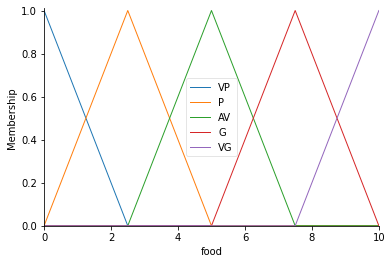

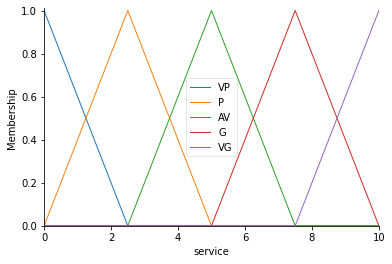

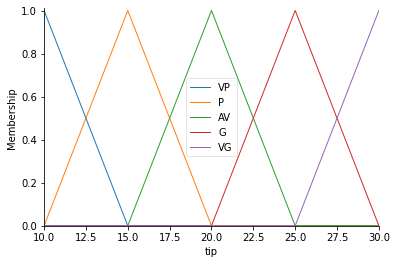

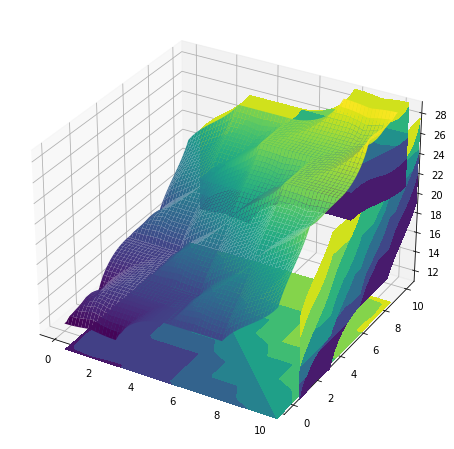

In [2]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from mpl_toolkits.mplot3d import axis3d
import matplotlib.pyplot as plt

    
universe1 = np.linspace(0,10,61)
universe2 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe1, 'food')
service  = ctrl.Antecedent(universe1, 'service')
tip = ctrl.Consequent(universe2, 'tip')
name1 = ['VP', 'P', 'AV', 'G', 'VG']     


food .automf(names = name1)
service .automf(names = name1)
tip.automf(names = name1)


rule0 = ctrl.Rule(antecedent = (
                                (food['VP'] & service['VP'])| 
                                (food['VP'] & service['P'])| 
                                (food['P'] & service['VP'])), 
                                consequent = tip['VP'], label = 'rule VP')

rule1 = ctrl.Rule(antecedent = ((food ['G'] & service['VP'])|
                                (food ['AV'] & service['VP'])|
                                (food ['AV'] & service['P'])| 
                                (food ['P'] & service['P'])| 
                                (food ['P'] & service['AV'])|
                                (food ['VP'] & service['AV'])|
                                (food ['VP'] & service['G'])), 
                                consequent = tip['P'], label = 'rule P')

rule2 = ctrl.Rule(antecedent = (( food ['VG'] & service['VP'])| 
                                (food ['G'] & service['P'])| 
                                (food ['AV'] & service['AV'])|
                                (food ['P'] & service['G'])|
                                (food ['VP'] & service['VG'])), 
                                consequent = tip['AV'], label = 'rule AV') 

rule3 = ctrl.Rule(antecedent = ((food ['VG'] & service['P'])| 
                                (food ['VG'] & service['AV'])| 
                                (food ['G'] & service['AV'])|
                                (food ['G'] & service['G'])|
                                (food ['AV'] & service['G'])|
                                (food ['AV'] & service['VG'])|
                                (food ['P'] & service['VG'])), 
                                consequent = tip['G'], label = 'rule G')

rule4 = ctrl.Rule(antecedent = ((food ['VG'] & service['G'])| 
                                (food ['VG'] & service['VG'])| 
                                (food ['G'] & service['VG'])), 
                                consequent = tip['VG'], label = 'rule VG')
     
food.view()
service.view()
tip.view()
system = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run =61 * 61 + 1)
upsampled = np.linspace(0,10,61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)   
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',   linewidth = 0.4, antialiased = True)                 
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 300)


<ipython-input-4-568c1abd797f>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-4-568c1abd797f>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-4-568c1abd797f>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


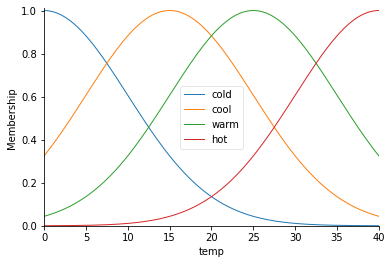

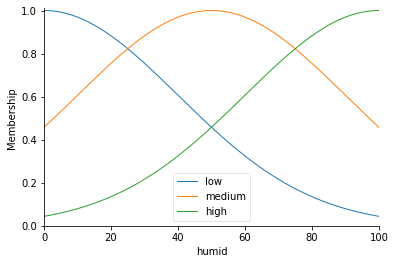

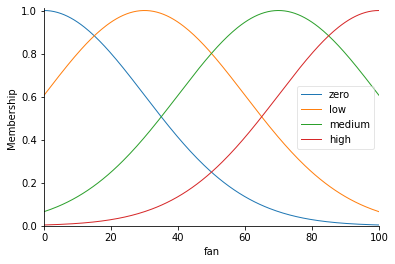

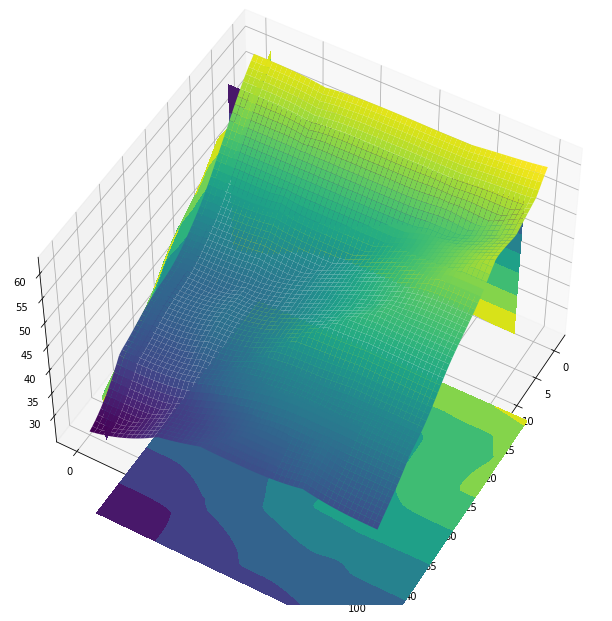

In [4]:
#EXERCISE 2: Fuzzy logic temperature control
import numpy as np
import skfuzzy as fuzzy
import matplotlib
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
from matplotlib.legend import time
from skfuzzy.control.controlsystem import ControlSystemSimulation
from mpl_toolkits.mplot3d import Axes3D  

#Create Universe with 3 variables temp, humid, and fan
universe = np.linspace(0,40,200) 
universe1 = np.linspace(0,100,200)
universe2 = np.linspace(0,100,200)

#Initialize Antecedent and Consequent
temp = ctrl.Antecedent(universe, 'temp')
humid = ctrl.Antecedent(universe1, 'humid')
fan = ctrl.Consequent(universe2, 'fan')
     
#Set up 
temp['cold'] = fuzzy.gaussmf(temp.universe,0,10)
temp['cool'] = fuzzy.gaussmf(temp.universe,15,10)
temp['warm'] = fuzzy.gaussmf(temp.universe,25,10)
temp['hot'] = fuzzy.gaussmf(temp.universe,40,10)

humid['low'] = fuzzy.gaussmf(humid.universe,0,40)
humid['medium'] = fuzzy.gaussmf(humid.universe,50,40)
humid['high'] = fuzzy.gaussmf(humid.universe,100,40)

fan['zero'] = fuzzy.gaussmf(fan.universe,0,30)
fan['low'] = fuzzy.gaussmf(fan.universe,30,30)
fan['medium'] = fuzzy.gaussmf(fan.universe,70,30)
fan['high'] = fuzzy.gaussmf(fan.universe,100,30)

#Display View
temp.view()
humid.view()
fan.view()

#Set Rules
rules = [ctrl.Rule(antecedent=((temp['cool']&humid['high'])|(temp['cold']&humid['medium'])|
                              (temp['cold']&humid['low'])), consequent= fan['medium']),

         ctrl.Rule(antecedent=((temp['warm']&humid['high'])|(temp['cool']&humid['medium'])|
                              (temp['cool']&humid['low'])), consequent= fan['low']),

         ctrl.Rule(antecedent=((temp['hot']&humid['high'])|(temp['warm']&humid['medium'])|
                              (temp['hot']&humid['medium'])|
                              (temp['hot']&humid['low'])|
                              (temp['warm']&humid['low'])), consequent= fan['zero']),

         ctrl.Rule(antecedent=((temp['cold']&humid['high'])), consequent= fan['high'])]

# Create control system and simulate
System  = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,40,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['temp']= x[i,j]
    sim.input['humid']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['fan']

fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,30)